In [4]:
# Class to use
import sys
sys.path.append("../../python")
from auditing_setup.election_setting import Election
from auditing_setup.audit_methods import *

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='serif', serif='Times')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
sns.set(style="darkgrid", font_scale=2)
sns.set_context('paper', font_scale=1.5)

def toggle_tex(to=None):
    if to is not None:
        plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
        plt.rc('text', usetex=to)
    elif mpl.rcParams['text.usetex']:
        plt.rc('text', usetex=False)
    else:
        plt.rc('text', usetex=True)
mpl.rcParams["savefig.dpi"] = 200
        
toggle_tex(to=False)
%matplotlib inline

# All boundary for with replacement version

In [43]:
election = Election(500, 500)

methods = dict(
    bayesian = BetaBayesian(a=1, b=1, critical_value=0.01),
    bayesian_large = BetaBayesian(a=50, b=50, critical_value=0.01),
    bravo = BRAVO(0.53, 0.05),
)

In [44]:
from collections import defaultdict

boundaries = defaultdict(list)

for t in range(1, 500):
    for name, method in methods.items():
        for y_t in range(t//2, t):
            if method(500, t, y_t):
                boundaries[name].append(y_t)
                break
        else:
            boundaries[name].append(None)
            
    lst = list(len(i) for i in boundaries.values())
    if not lst[1:] == lst[:-1]:
        for i, j in boundaries.items():
            print(i, len(j), len([i for i in j if i is None]), lst, t, y_t)

In [45]:
from numpy.random import rand
from numpy import cumsum
p = 0.59

sequences = []
for i in range(3):
    sequence = []
    while len(sequence)+1 <= len(boundaries['bayesian']):
        if p > rand(1)[0]:
            sequence.append((sequence[-1] if len(sequence) > 0 else 0) + 1)
        else:
            sequence.append((sequence[-1] if len(sequence) > 0 else 0))
    sequences.append(sequence)
sequences = pd.DataFrame(sequences).transpose()

In [46]:
bayesian_sequences = []
for i in range(3):
    sequence = sequences.loc[:, i]
    bayesian_sequence = []
    while len(bayesian_sequence)+1 <= len(boundaries['bayesian']):
        bayesian_sequence.append(sequence.iloc[len(bayesian_sequence)])
        if boundaries['bayesian'][len(bayesian_sequence)-1] is not None and bayesian_sequence[-1] >= boundaries['bayesian'][len(bayesian_sequence)-1]:
            break
    bayesian_sequence = [v/(i+1) for i,v in enumerate(bayesian_sequence)]
    bayesian_sequences.append(bayesian_sequence)
bayesian_sequences = pd.DataFrame(bayesian_sequences).transpose()

bayesian_term_point = []
for i in range(3):
    bayesian_sequence = bayesian_sequences.loc[:, i]
    x = len(bayesian_sequence.dropna())
    y = bayesian_sequence.dropna().iloc[-1]
    bayesian_term_point.append([x,y])

bayesian_sequences

,0,1,2
0,0.000000,1.000000,1.000000
1,0.500000,0.500000,0.500000
2,0.666667,0.666667,0.666667
3,0.500000,0.750000,0.500000
4,0.400000,0.600000,0.600000
5,0.333333,0.666667,0.666667
6,0.428571,0.714286,0.571429
7,0.500000,0.750000,0.625000
8,0.444444,0.777778,0.666667
9,0.400000,0.700000,0.700000


In [47]:
from numpy.random import rand
from numpy import cumsum
p = 0.59

sequences = []
for i in range(3):
    sequence = []
    while len(sequence)+1 <= len(boundaries['bayesian_large']):
        if p > rand(1)[0]:
            sequence.append((sequence[-1] if len(sequence) > 0 else 0) + 1)
        else:
            sequence.append((sequence[-1] if len(sequence) > 0 else 0))
    sequences.append(sequence)
sequences = pd.DataFrame(sequences).transpose()

In [48]:
bayesian_large_sequences = []
for i in range(3):
    sequence = sequences.loc[:, i]
    bayesian_large_sequence = []
    while len(bayesian_large_sequence)+1 <= len(boundaries['bayesian_large']):
        bayesian_large_sequence.append(sequence.iloc[len(bayesian_large_sequence)])
        if boundaries['bayesian_large'][len(bayesian_large_sequence)-1] is not None and bayesian_large_sequence[-1] >= boundaries['bayesian_large'][len(bayesian_large_sequence)-1]:
            break
    bayesian_large_sequence = [v/(i+1) for i,v in enumerate(bayesian_large_sequence)]
    bayesian_large_sequences.append(bayesian_large_sequence)
bayesian_large_sequences = pd.DataFrame(bayesian_large_sequences).transpose()

bayesian_large_term_point = []
for i in range(3):
    bayesian_large_sequence = bayesian_large_sequences.loc[:, i]
    x = len(bayesian_large_sequence.dropna())
    y = bayesian_large_sequence.dropna().iloc[-1]
    bayesian_large_term_point.append([x,y])

bayesian_large_sequences

,0,1,2
0,1.000000,1.000000,1.000000
1,0.500000,0.500000,1.000000
2,0.666667,0.666667,0.666667
3,0.750000,0.750000,0.500000
4,0.800000,0.800000,0.400000
5,0.666667,0.666667,0.333333
6,0.714286,0.571429,0.428571
7,0.625000,0.625000,0.500000
8,0.666667,0.555556,0.555556
9,0.600000,0.600000,0.600000


In [49]:
p = 0.55

bravo_sequences = []
for i in range(3):
    sequence = sequences.loc[:, i]
    bravo_sequence = []
    while len(bravo_sequence)+1 <= len(boundaries['bravo']):
        bravo_sequence.append(sequence.iloc[len(bravo_sequence)])
        if boundaries['bravo'][len(bravo_sequence)-1] is not None and bravo_sequence[-1] >= boundaries['bravo'][len(bravo_sequence)-1]:
            break
    bravo_sequence = [v/(i+1) for i,v in enumerate(bravo_sequence)]
    bravo_sequences.append(bravo_sequence)
bravo_sequences = pd.DataFrame(bravo_sequences).transpose()

bravo_term_point = []
for i in range(3):
    bravo_sequence = bravo_sequences.loc[:, i]
    x = len(bravo_sequence.dropna())
    y = bravo_sequence.dropna().iloc[-1]
    bravo_term_point.append([x,y])

bravo_sequences

,0,1,2
0,1.000000,1.000000,1.000000
1,0.500000,0.500000,1.000000
2,0.666667,0.666667,0.666667
3,0.750000,0.750000,0.500000
4,0.800000,0.800000,0.400000
5,0.666667,0.666667,0.333333
6,0.714286,0.571429,0.428571
7,0.625000,0.625000,0.500000
8,0.666667,0.555556,0.555556
9,0.600000,0.600000,0.600000


In [50]:
boundaries_df = pd.DataFrame(boundaries)

In [51]:
boundaries_df.reset_index(col_fill='index', inplace=True)
boundaries_df['index'] += 1
for col in boundaries_df.columns:
    if col != 'index':
        boundaries_df[col] = boundaries_df[col] / boundaries_df['index']
boundaries_df.set_index('index', inplace=True)
boundaries_df.fillna(1.01, inplace=True)

In [52]:
def pivot_widetable(df, names, groupers, *args, **kwargs):
    df_long = df.melt(*args, **kwargs)
    for name, grouper in zip(names, groupers):
        group = [grouper(i) for i in df_long['variable']]
        df_long[name] = group
    return df_long

In [53]:
names = [
    'type',
    'parameter'
]

def group_type(name):
    if 'max' in name.lower():
        return 'MaxBRAVO'
    if 'bravo' in name.lower():
        return 'BRAVO'
    if 'bayesian_large' in name.lower():
        return 'BayesianLarge'
    if 'bayesian' in name.lower():
        return 'Bayesian'
    else:
        return name
    
def group_parameter(name):
    return name.lower().replace(group_type(name).lower(), "")
    
groupers = [
    group_type,
    group_parameter
]

boundaries_df_long = pivot_widetable(boundaries_df.reset_index(), names, groupers, id_vars='index')

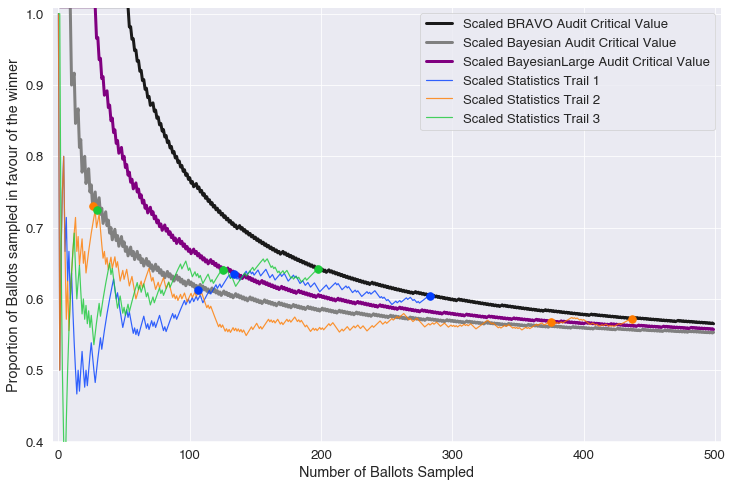

In [55]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
dash_styles = [(1, 0),
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]
dash_styles = [ [3*x for x in L ] for L in dash_styles ]

# dash_styles = ['-',
#                '-',
#                '--',
#                (20, 10),
#                (10, 5),
#                (5, 5, 2, 5),
#                (3, 3, 1, 1)]

current_palette = sns.color_palette('hls', 6)
palatte = [
    current_palette[1],
    current_palette[1],
    current_palette[1],
    current_palette[0],
    current_palette[0],
    current_palette[4],
    current_palette[5],
]

lws = [
    100, 5, 3,
    5, 3,
    5, 3
]

alphas = [
    
]

fig = plt.figure(figsize=[12, 8])

# ax = sns.lineplot(
#              data=boundaries_df['bravo'], 
#              legend=None,
#              linewidth=3,
#              c='k'
#             )
ax = sns.lineplot(
             data=boundaries_df['bravo'], 
             legend=None,
             linewidth=3,
             c='k'
            )

ax = sns.lineplot(
             data=boundaries_df['bayesian'],
             legend=None,
             linewidth=3,
             c='grey',
             ls='--'
            )

ax = sns.lineplot(
             data=boundaries_df['bayesian_large'],
             legend=None,
             linewidth=3,
             c='purple',
             ls='--'
            )


sns.lineplot(data=bravo_sequences, dashes=False, palette=sns.color_palette('bright', 3), alpha=0.8)

fontsize = 15
plt.ylim([0.4,1.01])
plt.xlim([-5,505])
plt.ylabel(r'Proportion of Ballots sampled in favour of the winner')
plt.xlabel(r'Number of Ballots Sampled')
# ax.set_title('Sample Election Audit Process')

plt.legend([
    r'Scaled BRAVO Audit Critical Value',
    r'Scaled Bayesian Audit Critical Value',
    r'Scaled BayesianLarge Audit Critical Value',
    r'Scaled Statistics Trail 1',
    r'Scaled Statistics Trail 2',
    r'Scaled Statistics Trail 3',
])
xs, ys = zip(*bayesian_term_point)
for x, y, c in zip(xs, ys, sns.color_palette('bright', 3)):
    plt.plot(x, y, '.', c=c, ms=15)

    
xs, ys = zip(*bravo_term_point)
for x, y, c in zip(xs, ys, sns.color_palette('bright', 3)):
    plt.plot(x, y, '.', c=c, ms=15)
    
xs, ys = zip(*bayesian_large_term_point)
for x, y, c in zip(xs, ys, sns.color_palette('bright', 3)):
    plt.plot(x, y, '.', c=c, ms=15)
# fig.savefig('../../figures/sample_decision_boundary_with_trail.png')